# Bipartite Graph Visualization with Dataset Sample


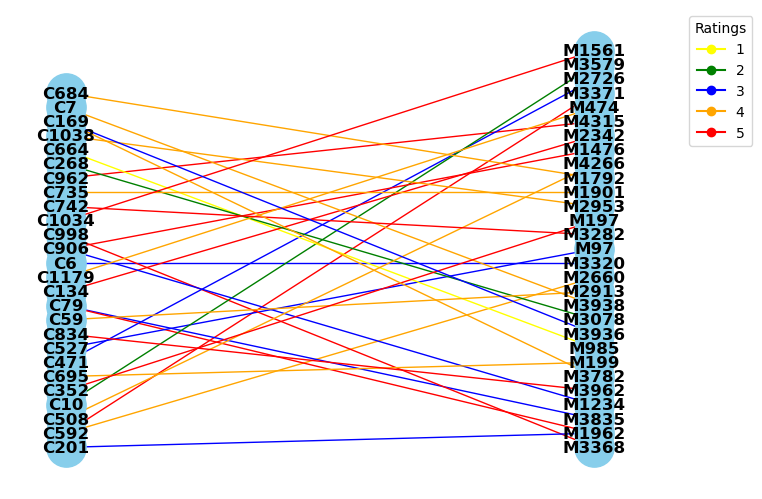

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('topic4_edge_list_200_customers.csv').sample(30).to_numpy()

G = nx.Graph()  # Creating bipartite graph object

for source, target, weight, date in data:  # Adding nodes and edges to the graph
    G.add_node(source, bipartite=0)
    G.add_node(target, bipartite=1)
    G.add_edge(source, target, weight=weight, date=date)

#Dictionary mapping ratings to their color codes
weight_colors = {
    1: 'yellow',
    2: 'green',
    3: 'blue',
    4: 'orange',
    5: 'red',
}

legend_labels = {rating: plt.Line2D([0], [0], marker='o', color=color, label=rating) for rating, color in weight_colors.items()} #legend box

# Separating nodes by bipartite sets
top_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0} # customer nodes
bottom_nodes = set(G) - top_nodes    # movie nodes

# Plotting the bipartite graph with different color edges for each weight category
pos = {node: (1, i) for i, node in enumerate(top_nodes)}  # Fixed position for top nodes
pos.update({node: (2, i) for i, node in enumerate(bottom_nodes)})  # Fixed position for bottom nodes

edge_colors = [weight_colors[G[u][v]['weight']] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, edge_color=edge_colors)
plt.legend(handles=legend_labels.values(), title='Ratings', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("bipartite_sample.png")
plt.show()

# Full Dataset Visualization

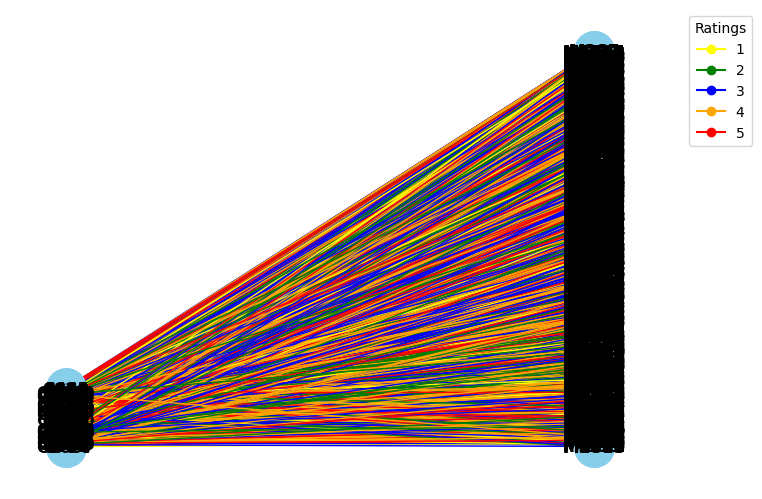

In [20]:
data = pd.read_csv('topic4_edge_list_200_customers.csv').to_numpy()

G = nx.Graph()

for source, target, weight, date in data: 
    G.add_node(source, bipartite=0)
    G.add_node(target, bipartite=1)
    G.add_edge(source, target, weight=weight, date=date)

top_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0} 
bottom_nodes = set(G) - top_nodes 

pos = {node: (1, i) for i, node in enumerate(top_nodes)}  
pos.update({node: (2, i) for i, node in enumerate(bottom_nodes)})

edge_colors = [weight_colors[G[u][v]['weight']] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, edge_color=edge_colors)
plt.legend(handles=legend_labels.values(), title='Ratings', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("bipartite_full_200.png")
plt.show()

# Network Statistics

In [14]:
data = pd.read_csv('topic4_edge_list_200_customers.csv').to_numpy()
G = nx.Graph()

for source, target, weight, date in data:
    G.add_node(source, bipartite=0)
    G.add_node(target, bipartite=1)
    G.add_edge(source, target, weight=weight, date=date)

# Network statistics
clustering_coefficient = nx.average_clustering(G)
degree_distribution = dict(G.degree())
max_degree = max(degree_distribution.values())
betweenness_centrality = nx.betweenness_centrality(G)
average_betweenness = sum(betweenness_centrality.values()) / len(betweenness_centrality)

# Display results
print(f"Clustering Coefficient: {clustering_coefficient}")
print("\n")
print(f"Degree Distribution: {degree_distribution}")
print("\n")
print(f"Maximum Degree: {max_degree}")
print("\n")
print(f"Betweenness Centrality: {betweenness_centrality}")
print("\n")
print(f"Average Betweenness: {average_betweenness}")

Clustering Coefficient: 0.0


Degree Distribution: {'C6': 153, 'M30': 54, 'M157': 1, 'M173': 1, 'M175': 36, 'M191': 44, 'M197': 33, 'M241': 13, 'M295': 12, 'M299': 32, 'M329': 30, 'M361': 14, 'M445': 3, 'M457': 48, 'M468': 27, 'M494': 14, 'M501': 7, 'M528': 10, 'M564': 3, 'M580': 2, 'M658': 10, 'M705': 15, 'M706': 1, 'M723': 2, 'M788': 22, 'M825': 2, 'M872': 13, 'M886': 58, 'M985': 37, 'M1096': 2, 'M1144': 32, 'M1145': 59, 'M1180': 48, 'M1195': 2, 'M1220': 65, 'M1238': 1, 'M1267': 13, 'M1307': 53, 'M1314': 5, 'M1399': 2, 'M1406': 28, 'M1428': 54, 'M1467': 8, 'M1476': 4, 'M1494': 2, 'M1542': 60, 'M1561': 26, 'M1571': 9, 'M1615': 27, 'M1642': 13, 'M1659': 13, 'M1693': 5, 'M1709': 6, 'M1756': 1, 'M1765': 1, 'M1798': 42, 'M1799': 26, 'M1803': 4, 'M1832': 9, 'M1843': 18, 'M1865': 47, 'M1901': 5, 'M1905': 79, 'M1918': 15, 'M1939': 4, 'M1962': 63, 'M1971': 3, 'M2000': 18, 'M2001': 11, 'M2095': 40, 'M2112': 40, 'M2140': 1, 'M2152': 72, 'M2200': 29, 'M2252': 9, 'M2269': 5, 'M2290': 20, 'M2340':

# Sorted Node Degree Distribution

In [15]:
l = list(degree_distribution.items())
l.sort(key=lambda x: x[1], reverse=True)
l

[('C769', 299),
 ('C79', 197),
 ('C7', 195),
 ('C134', 169),
 ('C481', 167),
 ('C199', 158),
 ('C906', 155),
 ('C6', 153),
 ('C684', 149),
 ('C188', 129),
 ('C265', 127),
 ('C1044', 125),
 ('C383', 120),
 ('C1086', 120),
 ('C462', 119),
 ('C527', 118),
 ('C97', 117),
 ('C283', 117),
 ('C561', 117),
 ('C735', 114),
 ('C981', 107),
 ('C602', 99),
 ('C201', 94),
 ('C477', 91),
 ('C596', 88),
 ('C788', 87),
 ('C785', 85),
 ('C756', 84),
 ('C195', 83),
 ('C1070', 83),
 ('C609', 82),
 ('M4432', 81),
 ('C695', 81),
 ('M1905', 79),
 ('C592', 79),
 ('C298', 78),
 ('C437', 78),
 ('C614', 75),
 ('C1146', 75),
 ('C766', 74),
 ('M2152', 72),
 ('M4306', 72),
 ('C305', 72),
 ('C424', 72),
 ('C304', 71),
 ('C268', 70),
 ('C302', 69),
 ('M3962', 68),
 ('C169', 68),
 ('M2372', 67),
 ('M3860', 66),
 ('C834', 66),
 ('M1220', 65),
 ('M3938', 65),
 ('C1082', 64),
 ('M1962', 63),
 ('M3624', 63),
 ('M2452', 62),
 ('C1117', 62),
 ('C183', 61),
 ('M1542', 60),
 ('C742', 60),
 ('M1145', 59),
 ('M2782', 59),
 ('C

In [17]:
l2 = list(betweenness_centrality.items())
l2.sort(key=lambda x: x[1], reverse=True)
l2

[('C769', 0.15309461755331527),
 ('C79', 0.05980074578549985),
 ('C906', 0.047272478500972506),
 ('C7', 0.04709252529425216),
 ('C481', 0.04396379748276616),
 ('C6', 0.04309938583180637),
 ('C134', 0.041451454310542105),
 ('C684', 0.03779249449279131),
 ('C1070', 0.03547951833102673),
 ('C756', 0.03207184867896578),
 ('C199', 0.030284290072921587),
 ('C97', 0.03017187277660728),
 ('C1044', 0.029223668372758835),
 ('C1086', 0.02700540754248292),
 ('C383', 0.026476941770399044),
 ('C527', 0.02640768559800777),
 ('C265', 0.024857870970853943),
 ('C561', 0.02376835523553527),
 ('C609', 0.02285285788233872),
 ('C87', 0.02245384887986828),
 ('M1905', 0.022089531475826964),
 ('C592', 0.021723080450464904),
 ('C477', 0.02139231539783048),
 ('M4432', 0.020921208050109143),
 ('C981', 0.02062544955221425),
 ('C307', 0.020593178777711288),
 ('C735', 0.020434738540203896),
 ('C596', 0.02031772125284897),
 ('C188', 0.019604443875102302),
 ('C462', 0.019404509902153592),
 ('C201', 0.01938659373152348